# **Cat Vs Dog Classification Project**


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 22.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Now we want pixel values from 0 to 1 so that we Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### **Create CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
# Now we are going to compile and execute our model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#In this we will run our model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 99ms/step - loss: 1.2017 - accuracy: 0.5607 - val_loss: 0.6457 - val_accuracy: 0.6226
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6440 - accuracy: 0.6417 - val_loss: 0.6935 - val_accuracy: 0.6750
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6082 - accuracy: 0.6880 - val_loss: 0.5303 - val_accuracy: 0.7392
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5067 - accuracy: 0.7415 - val_loss: 0.4847 - val_accuracy: 0.7678
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4414 - accuracy: 0.7766 - val_loss: 0.6895 - val_accuracy: 0.6826
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.3987 - accuracy: 0.7991 - val_loss: 0.5273 - val_accuracy: 0.7586
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.3441 - accuracy: 0.8282 - val_loss: 0.5430 - val_accur

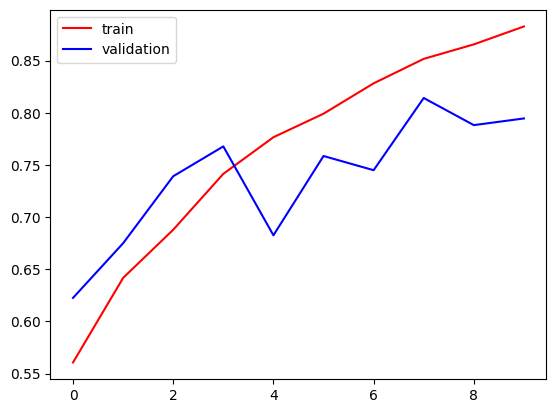

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

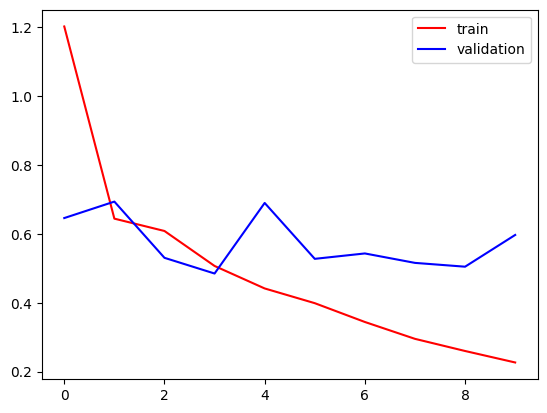

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
import matplotlib.image as mpimg


In [ ]:
img = mpimg.imread('/content/dog.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img.shape)

(3072, 3072, 3)


In [ ]:
print(img)

[[[253 246 244]
  [253 246 244]
  [253 246 244]
  ...
  [254 249 246]
  [254 249 246]
  [254 249 246]]

 [[253 246 244]
  [253 246 244]
  [253 246 244]
  ...
  [254 249 246]
  [254 249 246]
  [254 249 246]]

 [[253 246 244]
  [253 246 244]
  [253 246 244]
  ...
  [254 249 246]
  [254 249 246]
  [254 249 246]]

 ...

 [[250 247 237]
  [250 247 237]
  [250 247 237]
  ...
  [255 251 245]
  [255 251 245]
  [255 251 245]]

 [[250 247 237]
  [250 247 237]
  [250 247 237]
  ...
  [255 251 245]
  [255 251 245]
  [255 251 245]]

 [[250 247 237]
  [250 247 237]
  [250 247 237]
  ...
  [255 251 245]
  [255 251 245]
  [255 251 245]]]


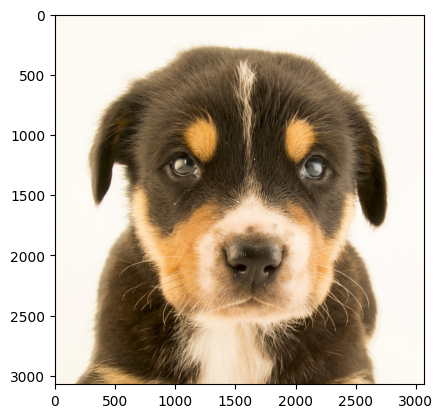

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(3072, 3072, 3)

In [ ]:
img = cv2.resize(img, (256,256))

In [ ]:
test_input = img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 271ms/step


array([[9.151641e-20]], dtype=float32)